In [0]:
!pip install demoji
!pip install emoji
!pip install Unidecode
import pandas as pd
import sys
import string  
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report
import numpy as np
import nltk
nltk.download('wordnet')
import cv2
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, r2_score
from os import listdir
from os.path import isfile, join
from sklearn import datasets, svm, metrics
from bs4 import BeautifulSoup
import re
from unidecode import unidecode
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from keras.utils import to_categorical
import demoji
import emoji
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=bdfcdc7059a5b11266e80317e3249ea08188b1c8926c5875f4f3abcefc824fea
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 245kB 6.1MB/s 
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


In [0]:
import csv

In [0]:
class cleaning:
  lemmatizer = WordNetLemmatizer()
  tok = WordPunctTokenizer()
  pat1 = r'@[A-Za-z0-9]+'
  pat2 = r'https?://[A-Za-z0-9./]+'
  combined_pat = r'|'.join((pat1, pat2))

  def tweet_cleaner(self,text):
      text = emoji.demojize(text)
      soup = BeautifulSoup(text, 'lxml')
      souped = soup.get_text()
      stripped = re.sub(self.combined_pat, '', souped)
      try:
          clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
      except:
          clean = stripped
      letters_only = re.sub("[^a-zA-Z]", " ", clean)
      letters_only = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', letters_only))
      lower_case = letters_only.lower()
      words = self.tok.tokenize(lower_case)
      wordss = []
      for w in words: 
        wordss.append(self.lemmatizer.lemmatize(w)) 
      S = (" ".join(wordss)).strip()
      return S

  def PreProcessing(self,Data):
      for i in range(Data.shape[0]):
          before = Data
          feature = Data.iloc[i,:]
          feature = ''.join(i for i in feature if not i.isdigit())
          exc = set(string.punctuation)
          feature = ''.join(ch for ch in feature if ch not in exc)
          feature = unidecode(feature)
          feature = feature.lower()
          feature = feature.strip()
          feature.encode('ascii', 'ignore').decode('ascii')
          tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
          tokens = tokenizer.tokenize(feature)
          New_Data = tokens
          Data.iloc[i,:] = ' '.join([str(w) for w in New_Data])
      return Data

  def All_clean(self,Data):
    test_result = []
    for t in Data.text:
      test_result.append(self.tweet_cleaner(t))
    test_result = pd.DataFrame(test_result, columns=['text'])
    # test_result = self.PreProcessing(test_result)
    return test_result


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data_4/1fe720be-90e4-4e06-9b52-9de93e0ea937_train.csv')
print(df[82:83])
YY = df['labels']

                                                 text  labels
82  😂Forget Parsees Save 😂 #CongBachaoRahulHatao #...       0


In [0]:
cln = cleaning()
clean_data = cln.All_clean(df)

In [0]:

class logistic_classifier:
  vectorizer = TfidfVectorizer()
  cls = cleaning()
  clf = LogisticRegression()
  c = None
  def __init__(self,C = 1.0):
    self.c = C;
  def train(self,df,Y):
    clean_data = self.cls.All_clean(df)
    print(clean_data.shape)
    X  = self.vectorizer.fit_transform(clean_data['text'])
    X_train,X_test,Y_train1,Y_test1 = train_test_split(X,Y ,train_size = 0.80)
    print(X_train.shape,' ',Y_train1.shape,' ',X_test.shape,' ',Y_test1.shape)
    self.clf = LogisticRegression(C = self.c,random_state=0).fit(X_train, Y_train1)
    y_pred = self.clf.predict(X_test)
    print(y_pred)
    y_true = Y_test1.values
    print(y_true)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    cls_rep = classification_report(y_true, y_pred, labels=[0,1])
    print(acc)
    print(f1)
    return f1,acc, cls_rep
  def test(self,test_data1):
    test_data1 = self.cls.All_clean(test_data1)
    X = self.vectorizer.transform(test_data['text'])
    Y_data = pd.read_csv('/content/drive/My Drive/Data_4/3c41266b-1527-4f61-b489-1357bb886bb2_sample_submission.csv')
    y_true_test = Y_data['labels'].values
    y_pred_test = self.clf.predict(X)
    y = pd.DataFrame(y_pred_test, columns=['labels'])
    y.to_csv('submission.csv', header=True, index=False) 
    print(pd.Series(y_true_test).value_counts()) 
    print(pd.Series(y_pred_test).value_counts())
    acc = accuracy_score(y_true_test, y_pred_test)    
    f1 = f1_score(y_true_test, y_pred_test)
    return [acc,f1]




In [0]:
print(cls_rep)

              precision    recall  f1-score   support

           0       0.56      0.38      0.45       382
           1       0.70      0.83      0.76       672

    accuracy                           0.67      1054
   macro avg       0.63      0.61      0.61      1054
weighted avg       0.65      0.67      0.65      1054



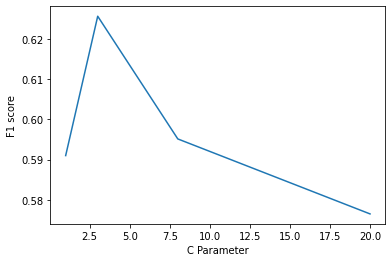

In [0]:
plt.plot( C,FF) 
plt.ylabel('F1 score') 
plt.xlabel('C Parameter') 
plt.savefig('foo.png')

In [0]:
classifier.test(test_data)

0    568
1     18
dtype: int64
1    424
0    162
dtype: int64


[0.3003412969283277, 0.07239819004524886]

In [0]:
A = pd.read_csv('/content/submission.csv')

In [0]:
print(A[82:83])

    labels
82       0


In [0]:
cla = cleaning()
clean_data = cla.All_clean(df)

In [0]:
clean_data[82:83].values

array([['face with tear of joy forget parsee save face with tear of joy cong bachao rahul hatao congressneveragain congress mukt maharashtra congress party congresschorhai rajivviraatvacation rajivgandhichorhai rahulscorpenelink rahul now liability congratulation mheshimiwa abki baar paar ab hoga nyay congress mukt bharat']],
      dtype=object)

In [0]:
from sklearn.svm import SVC
class svm_classifier:
  vectorizer = TfidfVectorizer()
  clf = None

  def __init__(self,c=1):
    self.clf = SVC(C=c, kernel='rbf')

  def train(self,X,Y):
    X=self.vectorizer.fit_transform(X['text'])
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,train_size = 0.80)
    print(X_train.shape,' ',Y_train.shape,' ',X_test.shape,' ',Y_test.shape)
    # X_train = X
    # Y_train  = Y
    hist=self.clf.fit(X_train,Y_train)
    y_pred=self.clf.predict(X_test)
    print(y_pred)
    y_true = Y_test.values
    print(y_true)
    acc = accuracy_score(y_true, y_pred)
    print(acc)
    print(f1_score(y_true, y_pred, average='macro'))
    cls_rep = classification_report(y_true, y_pred, labels=[0,1])
    print(cls_rep)
  
  def test(self,test_data):
    X_p = self.vectorizer.transform(test_data['text'])
    y_pred_test = self.clf.predict(X_p)
    y = pd.DataFrame(y_pred_test, columns=['labels'])
    y.to_csv('submission_1_svm.csv', header=True, index=False) 

In [0]:
cls_clf =  svm_classifier(20)
cls_clf.train(df,YY)
Acc=[0.6641366223908919,0.674573055028463,0.644212523719165, 0.6584440227703985,0.6698292220113852]
F1 =[0.5743891588529191,0.6113882645322808,0.5894321230799915,0.602963335007534,0.6082085726004922]
c = [1,2,3,5,10]

(4212, 18729)   (4212,)   (1054, 18729)   (1054,)
[1 0 1 ... 1 0 1]
[0 0 1 ... 1 1 1]
0.6470588235294118
0.6044309927360775
              precision    recall  f1-score   support

           0       0.61      0.39      0.47       432
           1       0.66      0.83      0.73       622

    accuracy                           0.65      1054
   macro avg       0.63      0.61      0.60      1054
weighted avg       0.64      0.65      0.63      1054



In [0]:
cls_clf =  svm_classifier(18)
cls_clf.train(df,YY)

(4212, 18729)   (4212,)   (1054, 18729)   (1054,)
[0 1 1 ... 0 0 1]
[0 0 1 ... 0 0 0]
0.6935483870967742
0.6434755380457037
              precision    recall  f1-score   support

           0       0.64      0.43      0.51       395
           1       0.71      0.85      0.78       659

    accuracy                           0.69      1054
   macro avg       0.67      0.64      0.64      1054
weighted avg       0.68      0.69      0.68      1054



In [0]:
Acc=[0.6641366223908919,0.674573055028463,0.644212523719165, 0.6584440227703985,0.6698292220113852, 0.6631878557874763,0.6935483870967742,0.6527514231499051
]
F1 =[0.5743891588529191,0.6113882645322808,0.5894321230799915,0.602963335007534,0.6082085726004922, 0.6161394401670163,0.6457961165149555,0.5864592981372851]
c = [1,2,3,5,10,15,20,22]

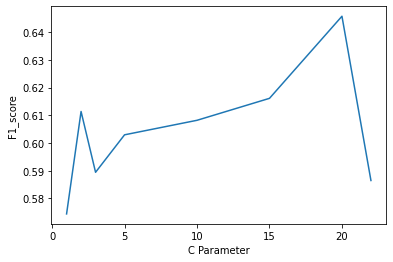

In [0]:
plt.plot(c,F1) 
plt.ylabel('F1_score') 
plt.xlabel('C Parameter') 
plt.savefig('foo.png')